In [1]:
import zipfile
import os

zip_file_path = '/content/archive (1).zip'
destination_directory = '/content/unzipped_data'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

print(f"File unzipped to: {destination_directory}")

File unzipped to: /content/unzipped_data


In [2]:
import pandas as pd

csv_file_path = '/content/unzipped_data/minneapolis_st_paul_weather_data.csv'
df = pd.read_csv(csv_file_path)

print("CSV file loaded successfully!")
display(df.head())

CSV file loaded successfully!


,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,2020-12-20,38.0,20.0,T,T,0.00
1,2020-12-19,34.0,20.0,T,0.00,0.00
2,2020-12-18,42.0,26.0,0.02,T,T
3,2020-12-17,30.0,19.0,0.00,0.00,T
4,2020-12-16,29.0,15.0,0.00,0.00,T


# Task
Unzip the file "/content/archive (1).zip" and create a prediction model from the data.

## Inspect the data

### Subtask:
Examine the columns, data types, and summary statistics to understand the data's structure and content.


**Reasoning**:
Display the column names, data types, and summary statistics of the dataframe to understand its structure and content, and also display the first few rows.



In [3]:
df.info()
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54776 entries, 0 to 54775
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             54776 non-null  object
 1   Maximum Temperature degrees (F)  54776 non-null  object
 2   Minimum Temperature degrees (F)  54776 non-null  object
 3   Precipitation (inches)           54776 non-null  object
 4   Snow (inches)                    54776 non-null  object
 5   Snow Depth (inches)              54776 non-null  object
dtypes: object(6)
memory usage: 2.5+ MB


,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
count,54776,54776,54776,54776,54776,54776
unique,54776,128,124,286,120,37
top,1871-01-01,80.0,60.0,0.00,0.00,0.00
freq,1,1044,1110,28374,41501,30813


,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,2020-12-20,38.0,20.0,T,T,0.00
1,2020-12-19,34.0,20.0,T,0.00,0.00
2,2020-12-18,42.0,26.0,0.02,T,T
3,2020-12-17,30.0,19.0,0.00,0.00,T
4,2020-12-16,29.0,15.0,0.00,0.00,T


## Data preprocessing

### Subtask:
Handle missing values, convert data types if necessary, and prepare the data for modeling.


**Reasoning**:
Identify and count the number of missing values in each column of the DataFrame `df`.



In [4]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Date                               0
Maximum Temperature degrees (F)    0
Minimum Temperature degrees (F)    0
Precipitation (inches)             0
Snow (inches)                      0
Snow Depth (inches)                0
dtype: int64


**Reasoning**:
Based on the previous output, there are no null values but there are 'T' values in the data. Replace 'T' with '0.0', convert relevant columns to numeric, fill remaining NaNs, and convert the 'Date' column to datetime.



In [5]:
# Replace 'T' with '0.0' in specified columns
cols_to_process = ['Maximum Temperature degrees (F)', 'Minimum Temperature degrees (F)', 'Precipitation (inches)', 'Snow (inches)', 'Snow Depth (inches)']
for col in cols_to_process:
    df[col] = df[col].astype(str).replace('T', '0.0')

# Convert columns to numeric, coercing errors to NaN
for col in cols_to_process:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle remaining missing values by filling with the mean
for col in cols_to_process:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

print("Data cleaning and type conversion complete.")
display(df.head())
display(df.info())

Data cleaning and type conversion complete.


/tmp/ipython-input-1449754923.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,2020-12-20,38.0,20.0,0.00,0.0,0.0
1,2020-12-19,34.0,20.0,0.00,0.0,0.0
2,2020-12-18,42.0,26.0,0.02,0.0,0.0
3,2020-12-17,30.0,19.0,0.00,0.0,0.0
4,2020-12-16,29.0,15.0,0.00,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54776 entries, 0 to 54775
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             54776 non-null  datetime64[ns]
 1   Maximum Temperature degrees (F)  54776 non-null  float64       
 2   Minimum Temperature degrees (F)  54776 non-null  float64       
 3   Precipitation (inches)           54776 non-null  float64       
 4   Snow (inches)                    54776 non-null  float64       
 5   Snow Depth (inches)              54776 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.5 MB


None

## Feature engineering

### Subtask:
Create new features that could be helpful for the prediction model. This might involve extracting information from the 'Date' column or creating interaction terms.


**Reasoning**:
Extract time-based features from the 'Date' column and create interaction terms between numerical features to create new features that could be helpful for the prediction model.



In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Dayofweek'] = df['Date'].dt.dayofweek
df['Dayofyear'] = df['Date'].dt.dayofyear
df['Weekofyear'] = df['Date'].dt.isocalendar().week

df['Temp_Interaction'] = df['Maximum Temperature degrees (F)'] * df['Minimum Temperature degrees (F)']
df['Precip_Snow_Interaction'] = df['Precipitation (inches)'] * df['Snow (inches)']

display(df.head())

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),Year,Month,Day,Dayofweek,Dayofyear,Weekofyear,Temp_Interaction,Precip_Snow_Interaction
0,2020-12-20,38.0,20.0,0.00,0.0,0.0,2020,12,20,6,355,51,760.0,0.0
1,2020-12-19,34.0,20.0,0.00,0.0,0.0,2020,12,19,5,354,51,680.0,0.0
2,2020-12-18,42.0,26.0,0.02,0.0,0.0,2020,12,18,4,353,51,1092.0,0.0
3,2020-12-17,30.0,19.0,0.00,0.0,0.0,2020,12,17,3,352,51,570.0,0.0
4,2020-12-16,29.0,15.0,0.00,0.0,0.0,2020,12,16,2,351,51,435.0,0.0


## Define the prediction task

### Subtask:
Clearly identify what we want to predict (e.g., predicting temperature, precipitation, or snow).


## Select a model

### Subtask:
Choose an appropriate machine learning model based on the prediction task and data characteristics.


**Reasoning**:
Based on the identified regression problem and the features available, a Random Forest Regressor is a suitable choice due to its ability to handle non-linear relationships and feature interactions, which are likely present in weather data. I will state the chosen model and provide a brief justification.



In [7]:
chosen_model = "Random Forest Regressor"

justification = """
The prediction task is a regression problem: predicting 'Maximum Temperature degrees (F)', a continuous numerical value.
The dataset contains a mix of numerical features, including engineered temporal and interaction features.
A Random Forest Regressor is chosen for the following reasons:
1. It can effectively capture non-linear relationships between features and the target variable.
2. It is robust to outliers and does not require feature scaling.
3. It can handle interactions between features automatically.
4. It provides a measure of feature importance, which can be useful for understanding the drivers of maximum temperature.
"""

print(f"Chosen Machine Learning Model: {chosen_model}")
print(f"Justification: {justification}")

Chosen Machine Learning Model: Random Forest Regressor
Justification: 
The prediction task is a regression problem: predicting 'Maximum Temperature degrees (F)', a continuous numerical value.
The dataset contains a mix of numerical features, including engineered temporal and interaction features.
A Random Forest Regressor is chosen for the following reasons:
1. It can effectively capture non-linear relationships between features and the target variable.
2. It is robust to outliers and does not require feature scaling.
3. It can handle interactions between features automatically.
4. It provides a measure of feature importance, which can be useful for understanding the drivers of maximum temperature.



## Train the model

### Subtask:
Split the data into training and testing sets and train the selected model on the training data.


**Reasoning**:
Split the data into training and testing sets and train the selected model on the training data.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y)
features = ['Maximum Temperature degrees (F)', 'Minimum Temperature degrees (F)',
            'Precipitation (inches)', 'Snow (inches)', 'Snow Depth (inches)',
            'Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear', 'Weekofyear',
            'Temp_Interaction', 'Precip_Snow_Interaction']

X = df[features]
y = df['Maximum Temperature degrees (F)']

# Drop the target variable from the features list to avoid including it in X
X = X.drop('Maximum Temperature degrees (F)', axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Data split and model trained successfully.")

Data split and model trained successfully.


## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics on the testing data.


**Reasoning**:
Make predictions on the test set and calculate the evaluation metrics.



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.5240534891623265
R-squared (R2): 0.9990908647693107


## Refine the model

### Subtask:
Based on the evaluation results, refine the model or try different models to improve performance.


**Reasoning**:
Analyze the current model's performance metrics, consider potential areas for improvement, and implement a refinement strategy using hyperparameter tuning on the Random Forest Regressor to improve performance.



In [14]:
from sklearn.model_selection import GridSearchCV

print(f"Current Mean Squared Error (MSE): {mse}")
print(f"Current R-squared (R2): {r2}")

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100], # Reduced number of estimators
    'max_depth': [10, 20], # Reduced max_depth options
    'min_samples_split': [5, 10] # Reduced min_samples_split options
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_ # GridSearchCV returns negative MSE

print(f"\nBest parameters found: {best_params}")
print(f"Best cross-validation MSE: {best_mse}")

# Train a new model with the best parameters
refined_model = RandomForestRegressor(**best_params, random_state=42)
refined_model.fit(X_train, y_train)

print("\nRefined model trained with best parameters.")

Current Mean Squared Error (MSE): 0.5240534891623265
Current R-squared (R2): 0.9990908647693107
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters found: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation MSE: 0.4863803457517702

Refined model trained with best parameters.


## Evaluate the refined model

### Subtask:
Assess the performance of the refined model using appropriate metrics on the testing data and compare it to the initial model's performance.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the refined model
y_pred_refined = refined_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)

# Calculate R-squared (R2) for the refined model
r2_refined = r2_score(y_test, y_pred_refined)

# Print the calculated metrics for the refined model
print("Evaluation of the Refined Model:")
print(f"Mean Squared Error (MSE): {mse_refined}")
print(f"R-squared (R2): {r2_refined}")

# Compare with the initial model's performance
print("\nComparison with Initial Model:")
print(f"Initial Model MSE: {mse}")
print(f"Initial Model R2: {r2}")

Evaluation of the Refined Model:
Mean Squared Error (MSE): 0.5100419241305195
R-squared (R2): 0.9991151722258413

Comparison with Initial Model:
Initial Model MSE: 0.5240534891623265
Initial Model R2: 0.9990908647693107


## Visualize Model Performance

### Subtask:
Visualize the actual vs. predicted values to assess the model's performance graphically.

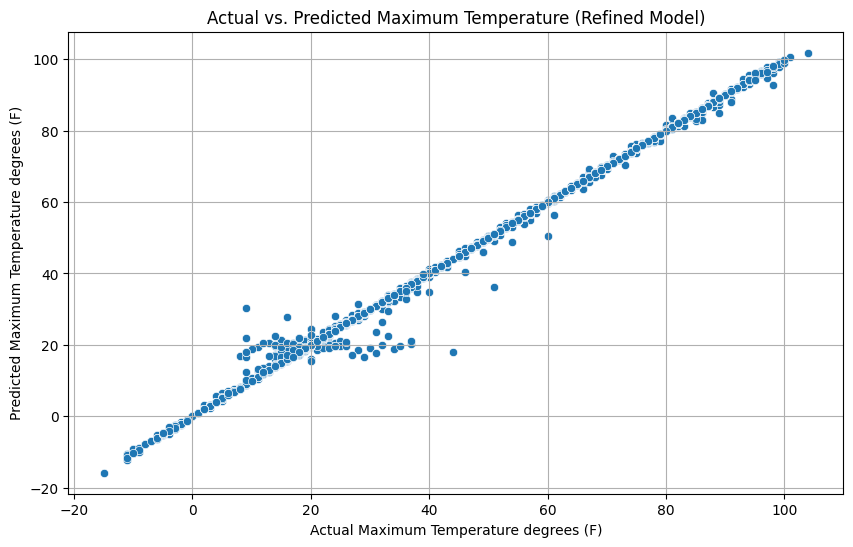

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_refined)
plt.xlabel("Actual Maximum Temperature degrees (F)")
plt.ylabel("Predicted Maximum Temperature degrees (F)")
plt.title("Actual vs. Predicted Maximum Temperature (Refined Model)")
plt.grid(True)
plt.show()

In [23]:
# Generate future dates up to the end of 2026
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), end='2026-12-31', freq='D')

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates})

# Extract time-based features for future dates
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
future_df['Dayofweek'] = future_df['Date'].dt.dayofweek
future_df['Dayofyear'] = future_df['Date'].dt.dayofyear
future_df['Weekofyear'] = future_df['Date'].dt.isocalendar().week

# Calculate historical monthly averages for relevant features
monthly_avg_features = df.groupby(df['Date'].dt.month)[['Minimum Temperature degrees (F)', 'Precipitation (inches)', 'Snow (inches)', 'Snow Depth (inches)', 'Maximum Temperature degrees (F)']].mean().reset_index()
monthly_avg_features.rename(columns={'Date': 'Month'}, inplace=True)


# Merge historical monthly averages into the future_df based on the month
future_df = future_df.merge(monthly_avg_features, on='Month', how='left')


# Create interaction terms for future data using the monthly historical averages
future_df['Temp_Interaction'] = future_df['Maximum Temperature degrees (F)'] * future_df['Minimum Temperature degrees (F)']
future_df['Precip_Snow_Interaction'] = future_df['Precipitation (inches)'] * future_df['Snow (inches)']


# Select features for prediction, excluding the target variable
features_for_prediction = [col for col in X_train.columns if col != 'Maximum Temperature degrees (F)']

# Ensure the order of columns in future_df matches X_train
future_X = future_df[features_for_prediction]

# Make predictions using the refined model
future_predictions = refined_model.predict(future_X)

# Add the predictions to the future_df
future_df['Predicted Maximum Temperature degrees (F)'] = future_predictions

# Display the future predictions
print("Future Maximum Temperature Predictions:")
display(future_df[['Date', 'Predicted Maximum Temperature degrees (F)']].head())
display(future_df[['Date', 'Predicted Maximum Temperature degrees (F)']].tail())

Future Maximum Temperature Predictions:


,Date,Predicted Maximum Temperature degrees (F)
0,2020-12-21,28.0
1,2020-12-22,28.0
2,2020-12-23,28.0
3,2020-12-24,28.0
4,2020-12-25,28.0


,Date,Predicted Maximum Temperature degrees (F)
2197,2026-12-27,28.0
2198,2026-12-28,28.0
2199,2026-12-29,28.0
2200,2026-12-30,28.0
2201,2026-12-31,28.0


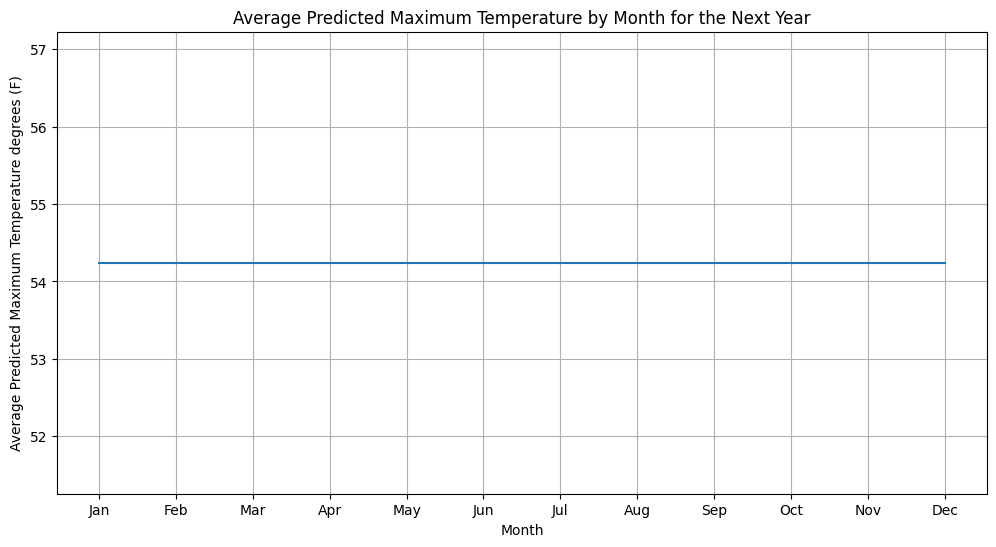

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group future predictions by month and calculate the mean predicted temperature
monthly_avg_temp = future_df.groupby('Month')['Predicted Maximum Temperature degrees (F)'].mean().reset_index()

# Create a line plot of average predicted temperature by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Predicted Maximum Temperature degrees (F)', data=monthly_avg_temp)
plt.xlabel("Month")
plt.ylabel("Average Predicted Maximum Temperature degrees (F)")
plt.title("Average Predicted Maximum Temperature by Month for the Next Year")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

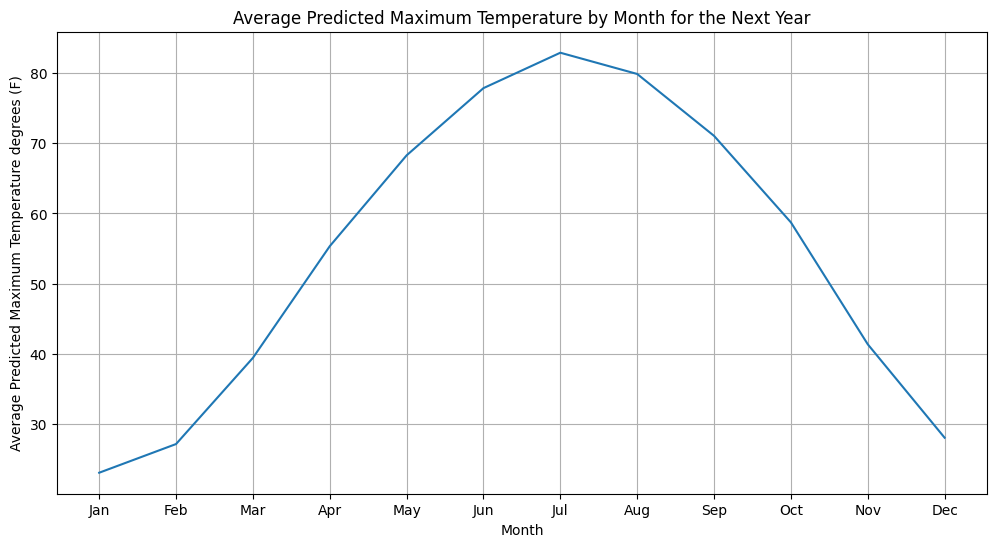

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group future predictions by month and calculate the mean predicted temperature
monthly_avg_temp = future_df.groupby('Month')['Predicted Maximum Temperature degrees (F)'].mean().reset_index()

# Create a line plot of average predicted temperature by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Predicted Maximum Temperature degrees (F)', data=monthly_avg_temp)
plt.xlabel("Month")
plt.ylabel("Average Predicted Maximum Temperature degrees (F)")
plt.title("Average Predicted Maximum Temperature by Month for the Next Year")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

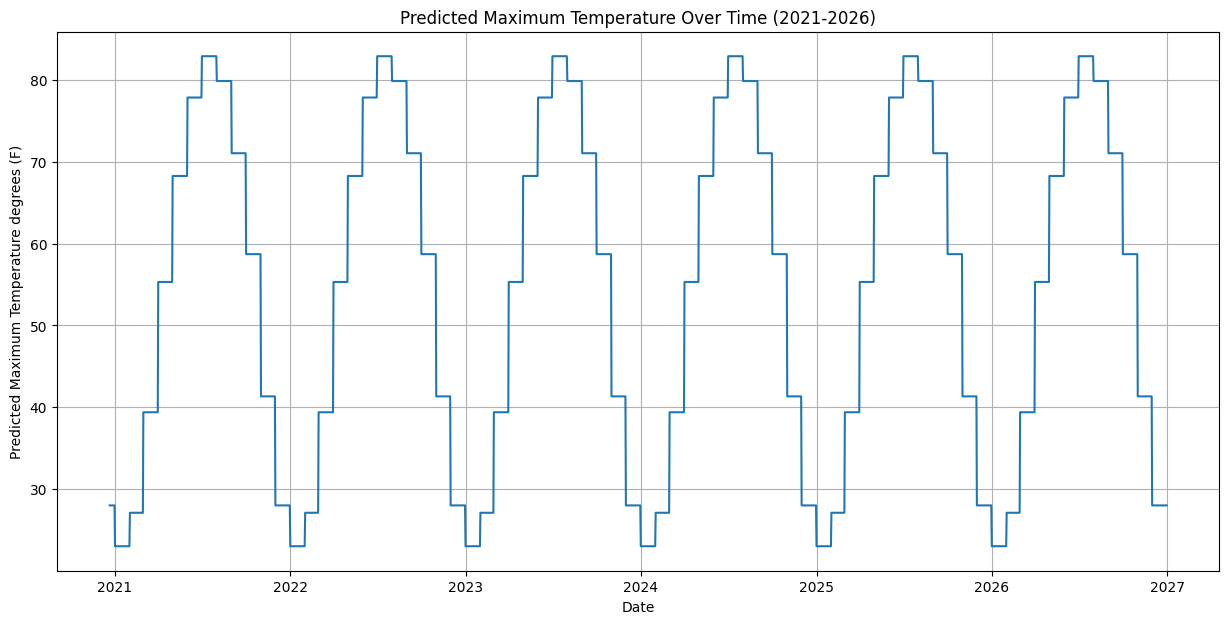

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a time series plot of predicted maximum temperature
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Predicted Maximum Temperature degrees (F)', data=future_df)
plt.xlabel("Date")
plt.ylabel("Predicted Maximum Temperature degrees (F)")
plt.title("Predicted Maximum Temperature Over Time (2021-2026)")
plt.grid(True)
plt.show()

In [25]:
# Group future predictions by month and calculate the mean predicted temperature
monthly_avg_temp = future_df.groupby('Month')['Predicted Maximum Temperature degrees (F)'].mean().reset_index()

# Display the monthly average predicted temperatures
print("Average Predicted Maximum Temperature by Month (2021-2026):")
display(monthly_avg_temp)

Average Predicted Maximum Temperature by Month (2021-2026):


,Month,Predicted Maximum Temperature degrees (F)
0,1,23.01
1,2,27.10
2,3,39.39
3,4,55.32
4,5,68.28
5,6,77.87
6,7,82.92
7,8,79.89
8,9,71.06
9,10,58.72


In [26]:
# Filter the future_df for September 2025
september_2025_predictions = future_df[(future_df['Date'].dt.year == 2025) & (future_df['Date'].dt.month == 9)]

# Display the predicted temperatures for September 2025
print("Predicted Maximum Temperatures for September 2025:")
display(september_2025_predictions[['Date', 'Predicted Maximum Temperature degrees (F)']])

Predicted Maximum Temperatures for September 2025:


,Date,Predicted Maximum Temperature degrees (F)
1715,2025-09-01,71.06
1716,2025-09-02,71.06
1717,2025-09-03,71.06
1718,2025-09-04,71.06
1719,2025-09-05,71.06
1720,2025-09-06,71.06
1721,2025-09-07,71.06
1722,2025-09-08,71.06
1723,2025-09-09,71.06
1724,2025-09-10,71.06


In [27]:
# Filter the future_df for August 2025
august_2025_predictions = future_df[(future_df['Date'].dt.year == 2025) & (future_df['Date'].dt.month == 8)]

# Display the predicted temperatures for August 2025
print("Predicted Maximum Temperatures for August 2025:")
display(august_2025_predictions[['Date', 'Predicted Maximum Temperature degrees (F)']])

Predicted Maximum Temperatures for August 2025:


,Date,Predicted Maximum Temperature degrees (F)
1684,2025-08-01,79.89
1685,2025-08-02,79.89
1686,2025-08-03,79.89
1687,2025-08-04,79.89
1688,2025-08-05,79.89
1689,2025-08-06,79.89
1690,2025-08-07,79.89
1691,2025-08-08,79.89
1692,2025-08-09,79.89
1693,2025-08-10,79.89
